<a href="https://colab.research.google.com/github/SergiyDovgopolyk/Data_Science/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
new_table = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
print(new_table.head())


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [4]:
print(new_table.shape)

(28, 9)


In [5]:
new_table.replace(to_replace='—', value=np.nan, inplace=True)
missing_ratios = new_table.isnull().sum() / len(new_table)
print(new_table)


               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [6]:
print(new_table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [7]:
new_table[["2014", "2019"]] = new_table[["2014", "2019"]].apply(pd.to_numeric)
print(new_table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [8]:
# missing_ratios = new_table.isnull().mean()
missing_ratios = new_table.isnull().sum() / len(new_table)

print(missing_ratios)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


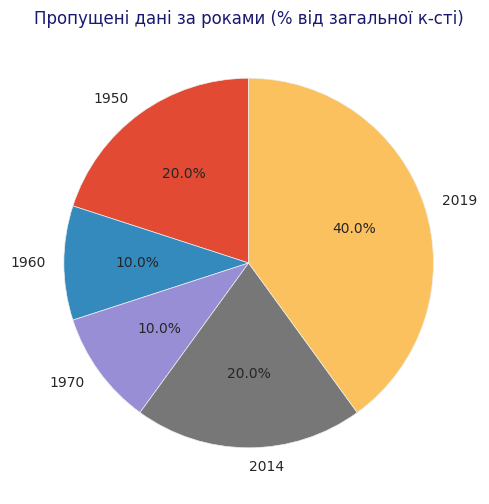

In [32]:
filtered_data = missing_ratios[missing_ratios != 0]

plt.figure(figsize=(6, 6))
plt.pie(filtered_data, labels=filtered_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Пропущені дані за роками (% від загальної к-сті)', fontsize=12, color="midnightblue")
plt.show()

In [9]:
new_table = new_table.iloc[:-1]
print(new_table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [10]:
new_table = new_table.fillna(new_table.mean())
print(new_table.round(2))

               Регіон  1950   1960  1970  1990  2000  2012   2014   2019
0                Крим  23.0  20.60  16.0  13.0   7.3  12.6  11.14   8.02
1           Вінницька  22.4  19.20  14.2  12.4   8.4  11.2  10.90   7.60
2           Волинська  24.7  25.00  17.9  15.3  11.2  14.8  14.10  10.10
3    Дніпропетровська  20.4  20.40  15.1  12.3   7.1  11.2  11.10   7.10
4            Донецька  27.1  21.40  14.0  10.9   6.1   9.8   8.20   8.02
5         Житомирська  26.1  22.30  15.9  12.9   8.9  12.2  12.00   7.90
6        Закарпатська  31.4  27.30  20.7  16.8  11.5  15.1  14.60  10.40
7          Запорізька  21.9  19.70  15.0  12.4   7.1  10.6  10.60   6.80
8   Івано-Франківська  24.3  24.80  18.2  15.5  10.3  12.4  12.20   8.80
9            Київська  20.4  18.90  15.6  12.3   7.3  12.2  12.10   8.00
10     Кіровоградська  21.6  17.10  14.5  12.6   7.9  11.0  10.80   6.80
11          Луганська  26.2  23.50  14.4  11.6   6.2   9.6   5.10   8.02
12          Львівська  23.4  24.00  17.1  14.0   9.

<ipython-input-10-491b0dfc6565>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_table = new_table.fillna(new_table.mean())


In [11]:
average_value = new_table['2019'].mean()

district_list = []
for index, value in new_table['2019'].items():
    if value > average_value:
        district_list.append(new_table.at[index, 'Регіон'])

print(district_list)

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [12]:
max_val = new_table['2014'].max()


# Finding the index of the max value
index = new_table['2014'].idxmax()

print(new_table.at[index, 'Регіон'], '-', max_val)

Рівненська - 14.8


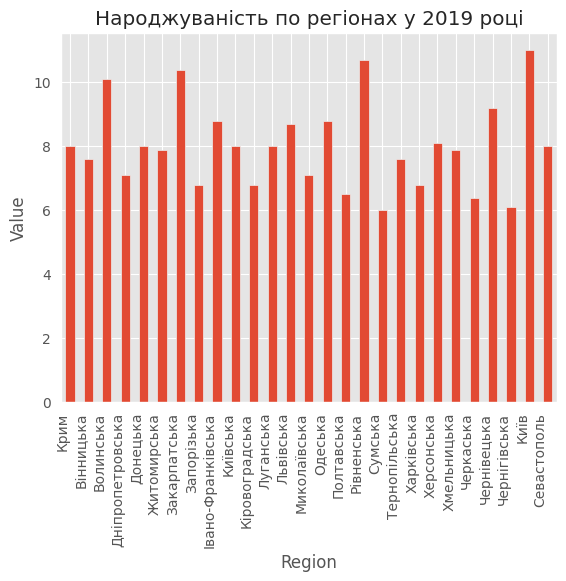

In [24]:
plt.style.use('ggplot')

# new_table.set_index('Регіон', inplace=True)

new_table['2019'].plot(kind='bar')

plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Region')
plt.ylabel('Value')

plt.xticks(rotation=90, ha='right')

plt.show()

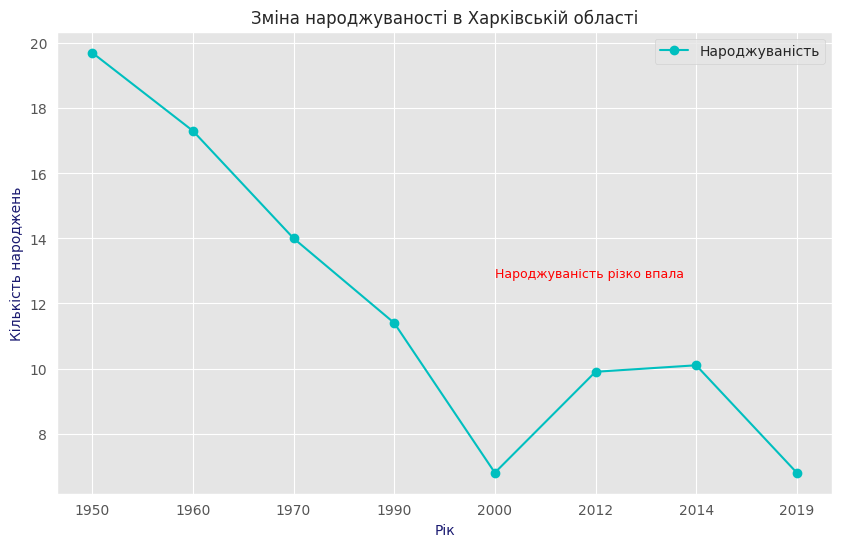

In [50]:
row = new_table.iloc[19]

plt.figure(figsize=(10, 6))
plt.plot(row.index, row.values, marker='o', color='c', label='Народжуваність')

plt.xlabel('Рік', fontsize='10', color='midnightblue')
plt.ylabel('Кількість народжень', fontsize='10', color='midnightblue')
plt.title('Зміна народжуваності в Харківській області', fontsize=12)

plt.text(row.idxmin(), row.min()+6, 'Народжуваність різко впала', color='red', fontsize=9)


plt.legend()
plt.show()